Initial workflow through for CNVnator.  
- Started 8/2/16
- Amanda Everitt
- cwd= /home/everitt/CNV/CNVnator

In [41]:
%%bash
ls ../cyp_genomes/CNVnator/*.bed |tr '\n' ','

../cyp_genomes/CNVnator/005_C_complete.bed,../cyp_genomes/CNVnator/02_SEL80.bam.cnv_output.filtered.bed,../cyp_genomes/CNVnator/02_SEL84.bam.cnv_output.filtered.bed,../cyp_genomes/CNVnator/02_SEL85.bam.cnv_output.filtered.bed,../cyp_genomes/CNVnator/04_SEL14.bam.cnv_output.filtered.bed,../cyp_genomes/CNVnator/04_SEL18.bam.cnv_output.filtered.bed,../cyp_genomes/CNVnator/04_SEL1.bam.cnv_output.filtered.bed,../cyp_genomes/CNVnator/04_SEL20.bam.cnv_output.filtered.bed,../cyp_genomes/CNVnator/04_SEL50.bam.cnv_output.filtered.bed,../cyp_genomes/CNVnator/04_SEL84.bam.cnv_output.filtered.bed,../cyp_genomes/CNVnator/04_SEL91.bam.cnv_output.filtered.bed,../cyp_genomes/CNVnator/10_SEL124.bam.cnv_output.filtered.bed,../cyp_genomes/CNVnator/10_SEL125.bam.cnv_output.filtered.bed,../cyp_genomes/CNVnator/10_SEL129.bam.cnv_output.filtered.bed,../cyp_genomes/CNVnator/10_SEL132.bam.cnv_output.filtered.bed,../cyp_genomes/CNVnator/10_SEL134.bam.cnv_output.filtered.bed,../cyp_genomes/CNVnator/10_SEL160.bam.

In [17]:
import os, subprocess

os.chdir("/home/everitt/CNV/gambiae_genomes/")
for i in os.listdir():
    print (i)
    #os.chdir("../../gambiae_genomes/")
    sh_file = open("{}.sh".format(i),"w")
    #sh_file.write('#!/bin/bash \n')
    #sh_file.write('## \n')
    sh_file.write('/home/travc/bin/run_cnvnator.sh -root cyp{}.root -tree {} && '.format(i,i))
    sh_file.write('/home/travc/bin/run_cnvnator.sh -root cyp{}.root -his 150 -d colony_CNV/ && '.format(i))
    sh_file.write('/home/travc/bin/run_cnvnator.sh -root cyp{}.root -stat 150 && '.format(i))
    sh_file.write('/home/travc/bin/run_cnvnator.sh -root cyp{}.root -partition 150 && '.format(i))
    sh_file.write('/home/travc/bin/run_cnvnator.sh -root cyp{}.root -call 150 > {}.cnv_output \n'.format(i,i))
    sh_file.close()
    
#cat *.sh > all.sh
#parallel --gnu --ungroup --nice 9 -a all.sh

2012KELA210.bam
2012KELA468.bam
2012KELA233.bam
2012KELA409.bam
2012KELA285.bam
2012KELA228.bam
2012KELA812.bam
2012KELA321.bam
2012KELA334.bam
2012KELA234.bam
2012KELA210.bam.sh
2012KELA348.bam


In [29]:
#Keeps calls which are 1.mapped 2. significant 3. larger than 1KB
import os

os.chdir("/home/everitt/CNV/gambiae_genomes/CNVnator")
for i in os.listdir():
    if i.endswith(".cnv_output"):
        f= open(i,'r')
        with open ('{}.filtered'.format(i),'w') as new:
            with open('{}.filtered.bed'.format(i),'w') as bed:
                for line in f:
                    parts= line.split()
                    if 'UNKN' not in parts[1] and 'Y_unplaced' not in parts[1] and 'chrMt' not in parts[1]: #if mapped
                        if float(parts[3]) < 0.05: # if evalue is less than 0.05 (https://www.biostars.org/p/194936/)
                            pos = parts[1].split(':')
                            coordinates= (pos[1]).split('-')
                            bp = int(coordinates[1])- int(coordinates[0])
                            if bp >= 1000:
                                new.write(line)
                                bed.write(str((pos[0][-2:])) + '\t' + coordinates[0] + '\t' + coordinates[1] + '\n')

In [36]:
%%bash

#to get list of all possible positions

#cyp
cd /home/everitt/CNV/cyp_genomes/CNVnator/
cat *.bed | sort > 01_all_C_pos

#cyp vs gambiae
cat /home/everitt/CNV/cyp_genomes/CNVnator/01_all_C_pos /home/everitt/CNV/gambiae_genomes/CNVnator/*.bed > 001_all_CG_pos

#gambiae vs post-cyp
cat /home/everitt/CNV/gambiae_genomes/CNVnator/001_all_G_pos 10_SEL124.bam.cnv_output.filtered.bed \
    10_SEL125.bam.cnv_output.filtered.bed 10_SEL129.bam.cnv_output.filtered.bed \
    10_SEL132.bam.cnv_output.filtered.bed 10_SEL134.bam.cnv_output.filtered.bed \
    10_SEL160.bam.cnv_output.filtered.bed 10_SEL190.bam.cnv_output.filtered.bed \
    12_SEL13.bam.cnv_output.filtered.bed 12_SEL3.bam.cnv_output.filtered.bed \
    12_SEL63.bam.cnv_output.filtered.bed 12_SEL9.bam.cnv_output.filtered.bed > 001_postCG_pos
    

In [ ]:
%%bash
#to get intersections between them -v to find unique -c to find amt overlap -wa -wb to see which overlap

#cyp to cyp
/home/everitt/bin/bedtools2/bin/intersectBed -wa -wb \
    -r \
    -f 0.5 \
    -a /home/everitt/CNV/cyp_genomes/CNVnator/001_all_C_pos \
    -b /home/everitt/CNV/cyp_genomes/CNVnator/001_all_C_pos\
    -filenames > 002_C_overlap
    
#cyp to gambaie
/home/everitt/bin/bedtools2/bin/intersectBed -wa -wb \
    -r \
    -f 0.5 \
    -a /home/everitt/CNV/gambiae_genomes/CNVnator/001_all_CG_pos \
    -b /home/everitt/CNV/gambiae_genomes/CNVnator/001_all_CG_pos\
    -filenames > 002_CG_overlap
    
#gambiae to post-cyp
/home/everitt/bin/bedtools2/bin/intersectBed -wa -wb \
    -r \
    -f 0.5 \
    -a /home/everitt/CNV/gambiae_genomes/CNVnator/001_postCG_pos \
    -b /home/everitt/CNV/gambiae_genomes/CNVnator/001_postCG_pos\
    -filenames > 002_postCG_overlap

In [1]:
pos_list=[]
deleted_list=[]
kept_list = []
with open('/home/everitt/CNV/gambiae_genomes/CNVnator/002_postCG_overlap') as overlap:
    with open('/home/everitt/CNV/gambiae_genomes/CNVnator/001_postCG_pos') as allpos:
        for line in allpos:
            line = line.split()
            pos_list.append(line[0]+':'+line[1]+':'+line[2])
        for line in overlap:
            line = line.split()
            query = line[0]+':'+line[1]+':'+line[2]
            mappedto = line[3]+':'+line[4]+':'+line[5]
            if query not in deleted_list and query != mappedto: #if its not already deleted or mapping back to itself
                #because if its already been deleted- it means it mapped above somewhere and now it will delete the ORIGINAL kept call
                deleted_list.append(mappedto) #make a list of everything that has been deleted
                if query not in kept_list: #new one we need to keep
                    kept_list.append(query)
            elif query not in deleted_list and query not in kept_list and query == mappedto:
                kept_list.append(query)
print ('...printing...')
with open('/home/everitt/CNV/gambiae_genomes/CNVnator/003_postCG_ref_pos','w') as newfile:
    for item in kept_list:
        items = item.split(':')
        newfile.write(items[0]+'\t'+items[1]+'\t'+items[2]+'\n')

...printing...


In [54]:
%%bash 
#double check work above to make sure everything only mapped once (to itself)
/home/everitt/bin/bedtools2/bin/intersectBed -c \
    -r \
    -f 0.5 \
    -a /home/everitt/CNV/cyp_genomes/CNVnator/003_C_ref_pos \
    -b /home/everitt/CNV/cyp_genomes/CNVnator/003_C_ref_pos \
    -filenames > mistakes
head mistakes

/home/everitt/bin/bedtools2/bin/intersectBed -c \
    -r \
    -f 0.5 \
    -a /home/everitt/CNV/gambiae_genomes/CNVnator/003_CG_ref_pos \
    -b /home/everitt/CNV/gambiae_genomes/CNVnator/003_CG_ref_pos \
    -filenames > CGmistakes
head CGmistakes

/home/everitt/bin/bedtools2/bin/intersectBed -c \
    -r \
    -f 0.5 \
    -a /home/everitt/CNV/gambiae_genomes/CNVnator/003_postCG_ref_pos \
    -b /home/everitt/CNV/gambiae_genomes/CNVnator/003_postCG_ref_pos \
    -filenames > postCGmistakes
head postCGmistakes

2L	1016101	1042800	1
2L	10303501	10307400	1
2L	104101	106050	1
2L	1050001	1051050	1
2L	1069801	1070850	1
2L	1112101	1125600	1
2L	1131001	1132950	1
2L	1176451	1178550	1
2L	1181851	1185150	1
2L	1194901	1198650	1


In [58]:
%%bash
#in command line (so correct dir and on screen, ran:)
#cyp v cyp
/home/everitt/bin/bedtools2/bin/intersectBed -wa -wb \
    -r   \
    -f 0.5 \
    -a /home/everitt/CNV/cyp_genomes/CNVnator/003_C_ref_pos \
    -b *.filtered.bed \
    -filenames > 004_C_intersect

#cyp v gambiae
/home/everitt/bin/bedtools2/bin/intersectBed -wa -wb \
    -r   \
    -f 0.5 \
    -a /home/everitt/CNV/gambiae_genomes/CNVnator/003_CG_ref_pos \
    -b *.filtered.bed \
    -filenames > 004_CG_intersect
    #copied all cyp bed files into gambiae directory for this part and then removed them. just fYI

#post cyp vs gambiae
/home/everitt/bin/bedtools2/bin/intersectBed -wa -wb \
    -r   \
    -f 0.5 \
    -a /home/everitt/CNV/gambiae_genomes/CNVnator/003_postCG_ref_pos \
    -b *.filtered.bed \
    -filenames > 004_postCG_intersect
    #copied post 06 cyp bed files into gambiae directory for this part and then removed them. just fYI

In [2]:
#make main file

def make_file(intersect_file, header, main_file):
    import pandas as pd
    index = {}
    with open(intersect_file) as intersect:
        for line in intersect:
                lines= line.split()
                ID= lines[0]+ ':' + lines[1] + ':' + lines[2] #make uniqueID
                index.setdefault(ID, []).append((lines[3])[:-24]) #populate index dict as {[ID:[filename,filename]], [ID2:[]]}
        df = pd.DataFrame(columns= header) #set columns as headers given
        count = 0
        for key,value in index.items():    #key= ID, value = all the files mapped there
            pos= key.split(':')
            l ={}  #dict of new line to be printed
            l['chr'] = pos[0]
            l['start'] = pos[1]
            l['stop'] = pos[2]   
            j=0
            while j < len(value): #while there is still files in this positions
                l[value[j]] = 1   #l at header present =1
                j+=1
            df.loc[key] = pd.Series(l)   #populate dataframe with dict 'l'
            count +=1
    df = df.fillna(0)        #want binary, so 0s not NaN
    df.to_csv(main_file, sep='\t',header=True)
    return (index)

def find_pre_v_post_Fst(index,total_pre,total_post):
    fst_dict = {}
    count = 0
    for key,value in index.items():
        called_pre = 0
        called_post = 0
        for i in value: #for every file that mapped to this position
            i = i.split('_')
            if int(i[0]) < 6: # if before 2006
                called_pre += 1
            else:
                called_post += 1
        PREp_freq = called_pre/total_pre
        PREq_freq = 1-PREp_freq
        
        POSTp_freq = called_post/total_post
        POSTq_freq = 1- POSTp_freq
    
        PRE_2pq = 2*PREp_freq*PREq_freq #heterozygosity (2pq) for each subpop
        POST_2pq = 2*POSTp_freq*POSTq_freq #ex 2 * (3/11) *(11-3/10)
        
        HS = (PRE_2pq + POST_2pq)/2 # average of these subpopulation heterozygosities
        ave_p = (PREp_freq+POSTp_freq)/2
        ave_q = (PREq_freq+POSTq_freq)/2
        HT = 2*ave_p*ave_q
        if HT != 0:
            FST = ((HT-HS)/HT)
            fst_dict[key] = FST
        else:
            fst_dict[key] = 0
    return (fst_dict)

def find_cyp_v_gambiae_FST(index,total_cyp,total_gam):
    fst_dict = {}
    count = 0
    for key,value in index.items():
        called_cyp=0
        called_gam =0
        for i in value:
            if '2012' in i: #if gambiae
                called_gam +=1
            elif '2012' not in i: #if cyp
                called_cyp +=1
        Cp_freq = called_cyp/total_cyp
        Cq_freq = 1-Cp_freq

        Gp_freq = called_gam/total_gam
        Gq_freq = 1- Gp_freq
      
        PQ2_cyp = 2*Cp_freq*Cq_freq #heterozygosity (2pq) for each subpop
        PQ2_gam = 2*Gp_freq*Gq_freq #ex 2 * (3/11) *(11-3/10)

        HS = (PQ2_cyp + PQ2_gam)/2 # average of these subpopulation heterozygosities
        ave_p = (Cp_freq+Gp_freq)/2
        ave_q = (Cq_freq+Gq_freq)/2
        HT = 2*ave_p*ave_q
        if HT != 0:
            FST = ((HT-HS)/HT)
            fst_dict[key] = FST
        else:
            fst_dict[key] = 0
    return (fst_dict)

def print_Fst(main_file, main_file_fst,header, fst_dict):
    f= open(main_file)
    new = open(main_file_fst, 'w')
    header = ['uniqueID'] + header
    header = header +['FST','\n']
    new.write('\t'.join(header))
    for line in f:
        for key,value in fst_dict.items():
            if key in line:
                value = (str.format('{0:.3f}', value))
                line= line.strip()
                new.write(line + '\t' +value + '\n')
    f.close()

In [ ]:
import os
print (os.listdir('/home/everitt/CNV/cyp_genomes/'))
print (os.listdir('/home/everitt/CNV/gambiae_genomes/'))

In [55]:
#ALL CYP
intersect_file = '/home/everitt/CNV/cyp_genomes/CNVnator/004_C_intersect'
header = ['chr','start','stop','02_SEL80.bam','10_SEL125.bam','12_SEL9.bam',\
        '10_SEL129.bam','04_SEL50.bam','04_SEL1.bam','10_SEL190.bam',\
        '02_SEL84.bam','12_SEL3.bam','12_SEL13.bam','10_SEL132.bam','12_SEL63.bam',\
        '04_SEL18.bam','04_SEL20.bam','10_SEL124.bam','04_SEL14.bam','02_SEL85.bam',\
        '04_SEL91.bam','10_SEL134.bam','04_SEL84.bam','10_SEL160.bam']
main_file = '/home/everitt/CNV/cyp_genomes/CNVnator/005_C_complete'
total_pre = 10 #in header
total_post = 11 #in header
main_file_fst ='/home/everitt/CNV/cyp_genomes/CNVnator/006_C_Fst'


index= make_file(intersect_file, header, main_file)
fst_dict = find_pre_v_post_Fst(index,total_pre,total_post)
print_Fst(main_file, main_file_fst, header, fst_dict)
print ('done')

done


In [65]:
#CYP vs Gambiae
intersect_file = '/home/everitt/CNV/gambiae_genomes/CNVnator/004_CG_intersect'
header = ['chr','start','stop','02_SEL80.bam','10_SEL125.bam','12_SEL9.bam',\
        '10_SEL129.bam','04_SEL50.bam','04_SEL1.bam','10_SEL190.bam',\
        '02_SEL84.bam','12_SEL3.bam','12_SEL13.bam','10_SEL132.bam','12_SEL63.bam',\
        '04_SEL18.bam','04_SEL20.bam','10_SEL124.bam','04_SEL14.bam','02_SEL85.bam',\
        '04_SEL91.bam','10_SEL134.bam','04_SEL84.bam','10_SEL160.bam','2012KELA210.bam',\
        '2012KELA468.bam','2012KELA233.bam', '2012KELA409.bam', '2012KELA285.bam', \
        '2012KELA228.bam', '2012KELA812.bam', '2012KELA321.bam', \
        '2012KELA334.bam', '2012KELA234.bam', '2012KELA348.bam']
main_file = '/home/everitt/CNV/gambiae_genomes/CNVnator/005_CG_complete'
total_cyp = 21 #in header
total_gam = 11 #in header
main_file_fst ='/home/everitt/CNV/gambiae_genomes/CNVnator/006_CG_Fst'


index= make_file(intersect_file, header, main_file)
fst_dict = find_cyp_v_gambiae_FST(index,total_cyp,total_gam)
print_Fst(main_file, main_file_fst, header, fst_dict)
print ('done')

done


In [3]:
#Post CYP vs Gambiae
intersect_file = '/home/everitt/CNV/gambiae_genomes/CNVnator/004_postCG_intersect'
header = ['chr','start','stop','10_SEL125.bam','12_SEL9.bam','10_SEL129.bam','10_SEL190.bam',\
         '12_SEL3.bam','12_SEL13.bam','10_SEL132.bam','12_SEL63.bam','10_SEL124.bam',\
         '10_SEL134.bam','10_SEL160.bam','2012KELA210.bam','2012KELA468.bam','2012KELA233.bam',\
         '2012KELA409.bam', '2012KELA285.bam','2012KELA228.bam', '2012KELA812.bam', \
         '2012KELA321.bam','2012KELA334.bam', '2012KELA234.bam', '2012KELA348.bam']
main_file = '/home/everitt/CNV/gambiae_genomes/CNVnator/005_postCG_complete'
total_cyp = 11 #in header
total_gam = 11 #in header
main_file_fst ='/home/everitt/CNV/gambiae_genomes/CNVnator/006_postCG_Fst'


index= make_file(intersect_file, header, main_file)
fst_dict = find_cyp_v_gambiae_FST(index,total_cyp,total_gam)
print_Fst(main_file, main_file_fst, header, fst_dict)
print ('done')

done


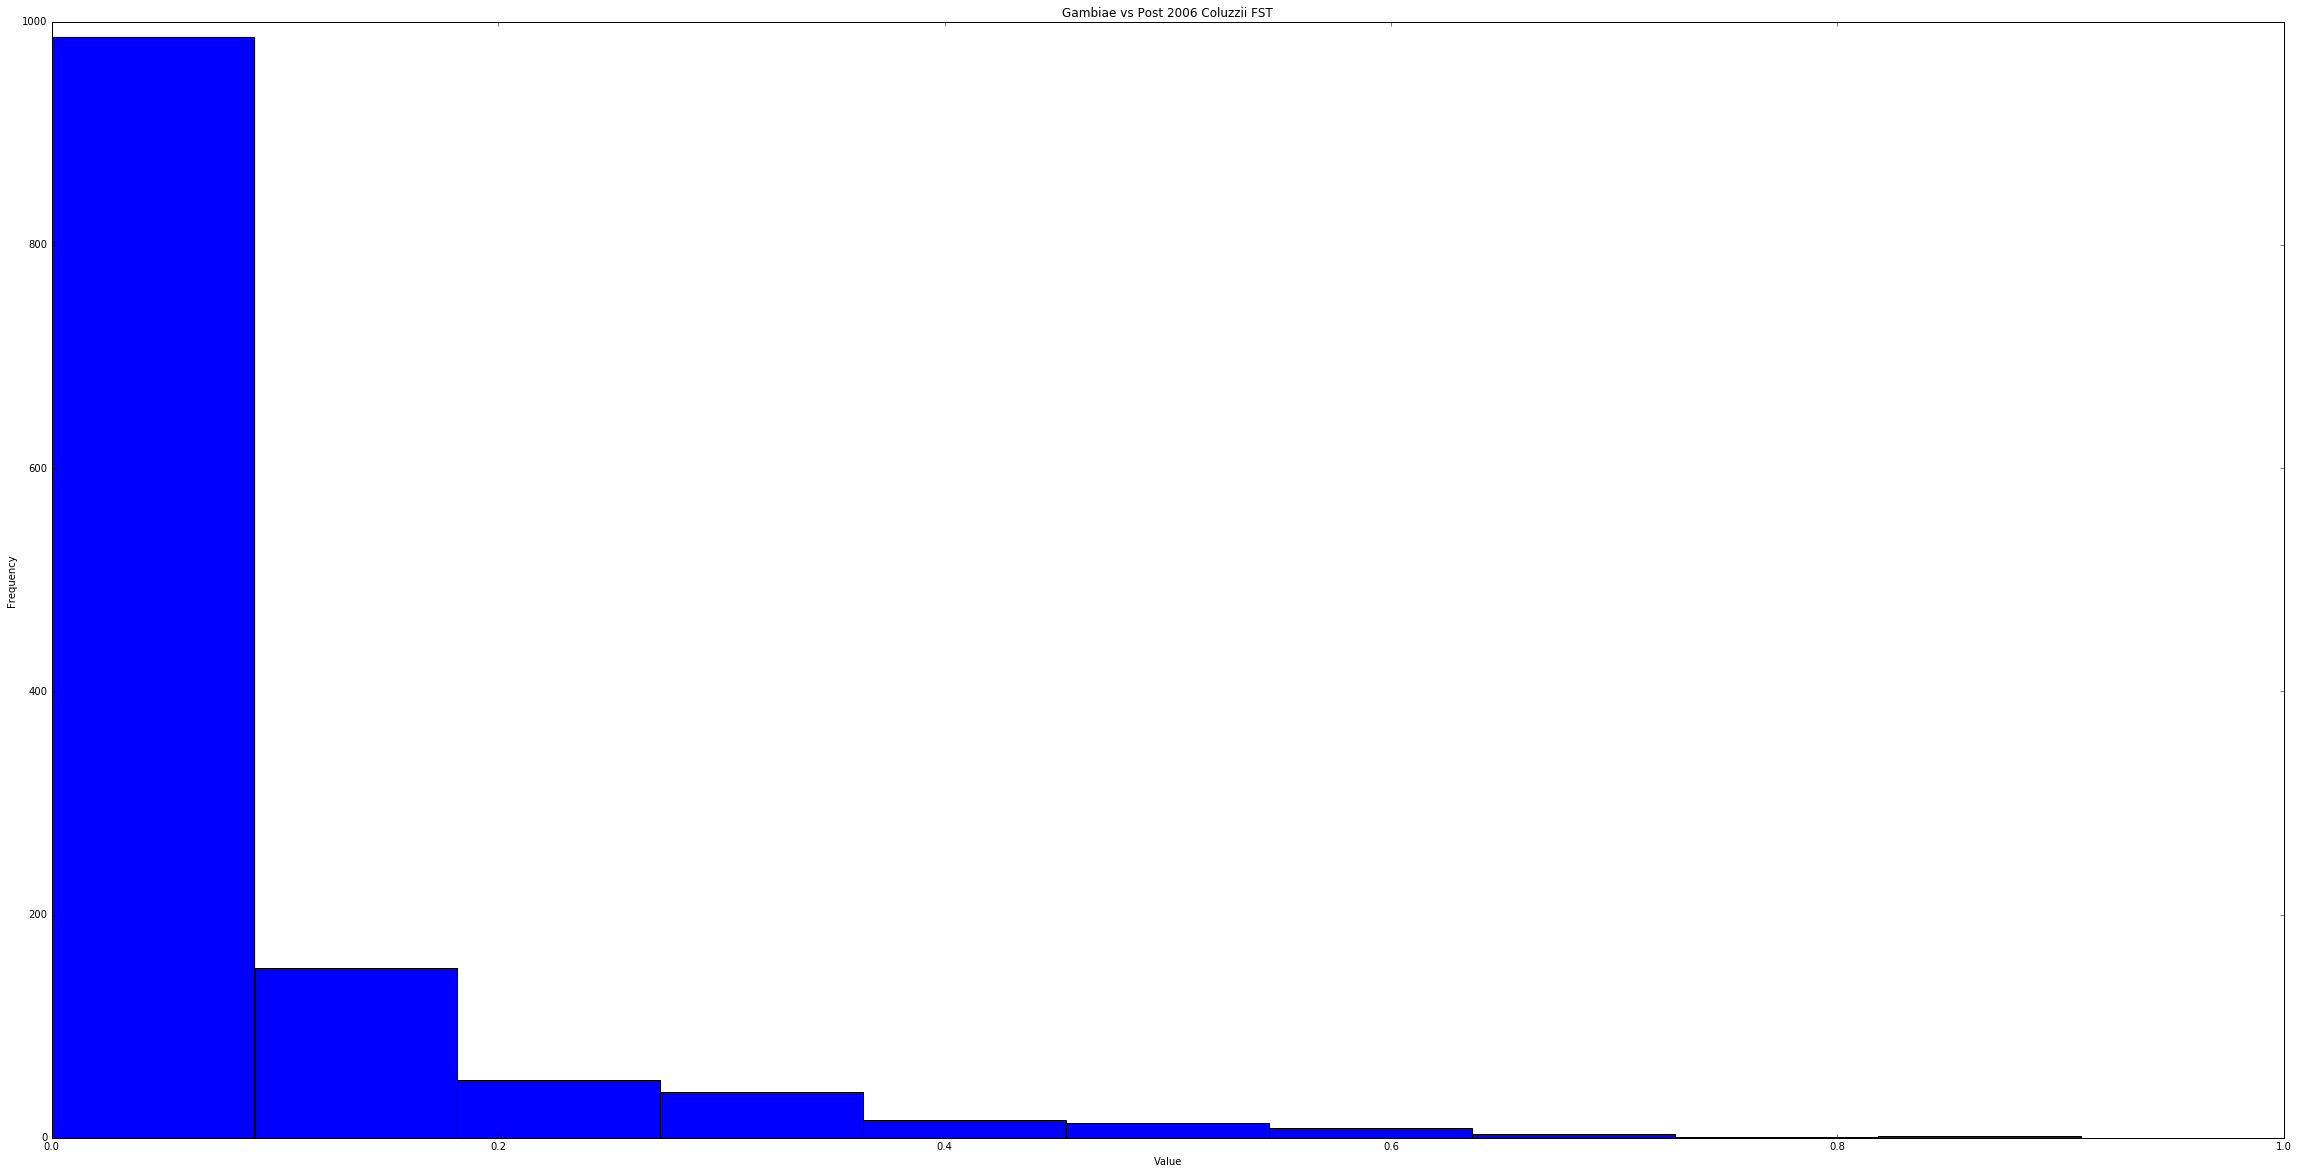

0.110901076309
1275
54


In [13]:
import matplotlib.pyplot as plt
import numpy

%matplotlib inline
plt.rcParams['figure.figsize'] = (40.0, 20.0)

Fst = []
for line in open('/home/everitt/CNV/gambiae_genomes/CNVnator/006_CG_Fst','r'):
#for line in open('/home/everitt/CNV/cyp_genomes/CNVnator/006_C_Fst','r'):
#for line in open('/home/everitt/CNV/gambiae_genomes/CNVnator/006_postCG_Fst','r'):
    if 'uniqueID' not in line:
        i= line.strip().split('\t')
        for j in i[-1:]:
            Fst.append(float(j))

plt.hist(Fst, bins=10)
#plt.title("Gambiae vs Coluzzii FST")
#plt.title("Pre06-cyp vs Post-cyp FST")
plt.title("Gambiae vs Post 2006 Coluzzii FST")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

mean = (numpy.std(Fst))
print (mean)
outliers= []
twoSD = (2*(numpy.std(Fst)))
for i in Fst:
    if i > (twoSD + mean) or i < (mean - twoSD):
        outliers.append(i)
print (len(Fst))
print (len(outliers))

weighted mean of all PRE and Post FST